This notebook demonstrates gradient descent algorithm for linear regression with single feature

A synthetic dataset with single feature (House size) and continuous target value (price) is used for the demo

It also demonstrates vectorization of MSE loss calculation; vectorization converts the calculation of average loss to vector/matrix inner product 



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

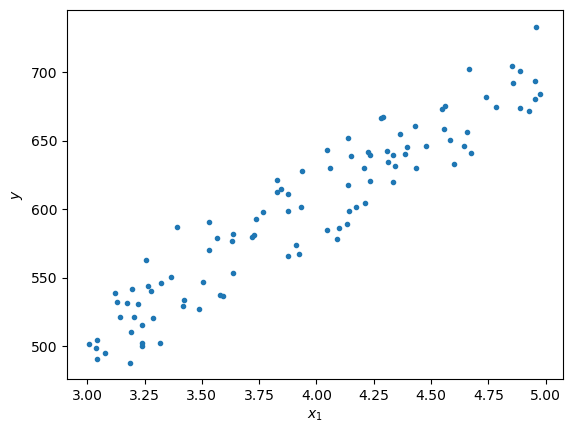

In [17]:
# Generate synthetic housing data
np.random.seed(0)
# Number of samples
m = 100
# House size in 1000 square feet (feature: x_1)
x_1 = 2 * np.random.rand(m, 1) + 3  
#label y
y = 200 + 100 * x_1 + np.random.randn(m, 1) * 20  # Price in $1000

#Plot the data
plt.plot(x_1, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

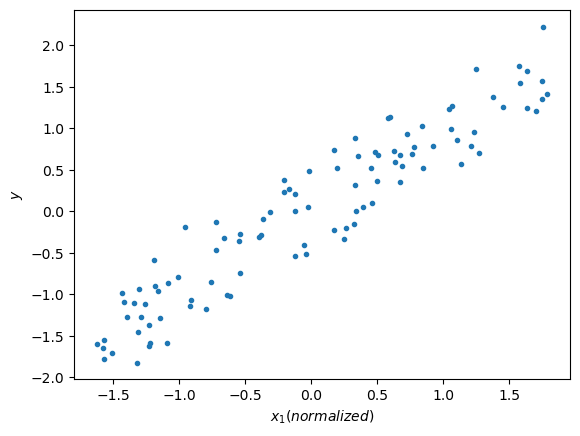

In [18]:
# Normalize data 
x_1_normalized = (x_1 - np.mean(x_1)) / np.std(x_1)
y_normalized = (y - np.mean(y)) / np.std(y)
plt.plot(x_1_normalized, y_normalized, ".")
plt.xlabel("$x_1 (normalized)$")
plt.ylabel("$y$")
plt.show()

In [19]:
# Add bias term (intercept term) and create the feature matrix X
# First column contains 1s and second column contains plot size
X = np.c_[np.ones((m, 1)), x_1_normalized]
#print(X)

# Random initialization of weight vector [w0 w1]^T
w = np.random.randn(2, 1)

# Gradient Descent: parameters
learning_rate = 0.1
n_iterations = 10

In [20]:
# Store updates for plotting
w_path = [w.ravel()]  # Flatten and store the initial weights

# Create a grid of weight values for the contour plot
w0_vals = np.linspace(-5, 5, 100)
w1_vals = np.linspace(-5, 5, 100)

J_w = np.zeros((len(w0_vals), len(w1_vals)))
error_function = np.zeros((len(w0_vals), len(w1_vals)))

### Cost Function

The cost function $ J(\mathbf{w}) $ is defined as:

$$ J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} \left( w_0 + w_1 x^{(i)} - y^{(i)} \right)^2 $$

- $ m $ is the number of training examples
- $ w_0 $ is the bias term
- $ w_1 $ is the weight for the feature
- $ x^{(i)} $ is the input feature of the $i$-th training example 
- $ y^{(i)} $ is the actual output of the $i$-th training example

### Cost Function in Matrix Form

Cost Function can be rewritten in matrix form as shown below:

   - Let $ \mathbf{X} $ be the $ m \times 2 $ feature matrix where the first column is all ones (for the bias term) and the second column is the vector of feature values:
     $
     \mathbf{X} = \begin{bmatrix}
     1 & x^{(1)} \\
     1 & x^{(2)} \\
     \vdots & \vdots \\
     1 & x^{(m)}
     \end{bmatrix}
     $
   
   - Let $ \mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $
   
   - Let $ \mathbf{y} $ be the $ m \times 1 $ vector of actual outputs:
     $
     \mathbf{y} = \begin{bmatrix}
     y^{(1)} \\
     y^{(2)} \\
     \vdots \\
     y^{(m)}
     \end{bmatrix}
     $
  
  - The hypothesis function for all training examples can be written as:
     $
     \mathbf{h}_w = \mathbf{X}\mathbf{w} = \begin{bmatrix}
     1 & x^{(1)} \\
     1 & x^{(2)} \\
     \vdots & \vdots \\
     1 & x^{(m)}
     \end{bmatrix} \begin{bmatrix}
     w_0 \\
     w_1
     \end{bmatrix} = \begin{bmatrix}
     w_0 + w_1 x^{(1)} \\
     w_0 + w_1 x^{(2)} \\
     \vdots \\
     w_0 + w_1 x^{(m)}
     \end{bmatrix}
     $

  - The residuals or errors for all training examples can be written as:
     $
     \mathbf{e} = \mathbf{X}\mathbf{w} - \mathbf{y} = \begin{bmatrix}
     w_0 + w_1 x^{(1)} - y^{(1)} \\
     w_0 + w_1 x^{(2)} - y^{(2)} \\
     \vdots \\
     w_0 + w_1 x^{(m)} - y^{(m)}
     \end{bmatrix}
     $

  - The sum of squared residuals can be written as a dot product:

    $||e||^2 = \mathbf{e}^T \mathbf{e} = (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y})$


   - Therefore, the average cost function can be written as:

   

     $J(\mathbf{w}) = \frac{1}{2m} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y}) = \frac{1}{2m} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2$

     The value 2 in the denominator is typically used in MSE; when we take the derivative, the 2 in the denominator cancels out. The presence of 2 does not effect the optimal $\mathbf{w}$.

In [21]:
# Calculate the loss function values over the grid
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        t = np.array([w0, w1])
        #print(t)
        error_vector = X.dot(t.reshape(2, 1)) - y_normalized
        #print(error_vector)
        #dot product of error vector (e^T.e) is a scalar; item() converts the numpy object to scalar 
        J_w[i, j] = (1/ (2*m)) * (error_vector.T @ error_vector).item()         
        #print(J_w[i, j])

In [22]:
print(X.shape[0])
print(np.shape(J_w))

100
(100, 100)


In [23]:

T0, T1 = np.meshgrid(w0_vals, w1_vals)
# Create a surface plot trace
surface = go.Surface(
    x=T0,
    y=T1,
    z=J_w,
    colorscale='Viridis'
)
# Create a figure and add the surface plot
fig = go.Figure(data=[surface])
# Set layout options
fig.update_layout(
    scene=dict(
        xaxis=dict(title='w0 (bias term)'),
        yaxis=dict(title='w1 (feature weight)'),
        zaxis=dict(title='Error Function'),
    ),
    title='Surface Plot of Error Function',
    width = 800,
    height = 600
)
# Display the plot
fig.show()

### Gradient of the Cost Function

Given the cost function:

$$ J(\mathbf{w}) = \frac{1}{2m} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y}) = \frac{1}{2m} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2 $$

we want to find the gradient of $ J(\mathbf{w}) $ with respect to $ \mathbf{w} $:

$$ \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} $$

$$ \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{2m} \nabla_{\mathbf{w}} \left( (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y}) \right) $$

   - Let $$ \mathbf{e} = \mathbf{X}\mathbf{w} - \mathbf{y} $$.

   - Then :
     $$\nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{2m} \nabla_{\mathbf{w}} \left( \mathbf{e}^T \mathbf{e} \right)$$

   - The gradient of $ \mathbf{e}^T \mathbf{e} $ with respect to $ \mathbf{w} $ is $ 2 \mathbf{X}^T \mathbf{e} $.

   - Substituting $ \mathbf{e} $ back in, we get
     $$
     \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{2m} \cdot 2 \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{y})
     $$
   - Simplifying, we get
     
     $$      \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{m} \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{y}) $$



# Gradient Descent 

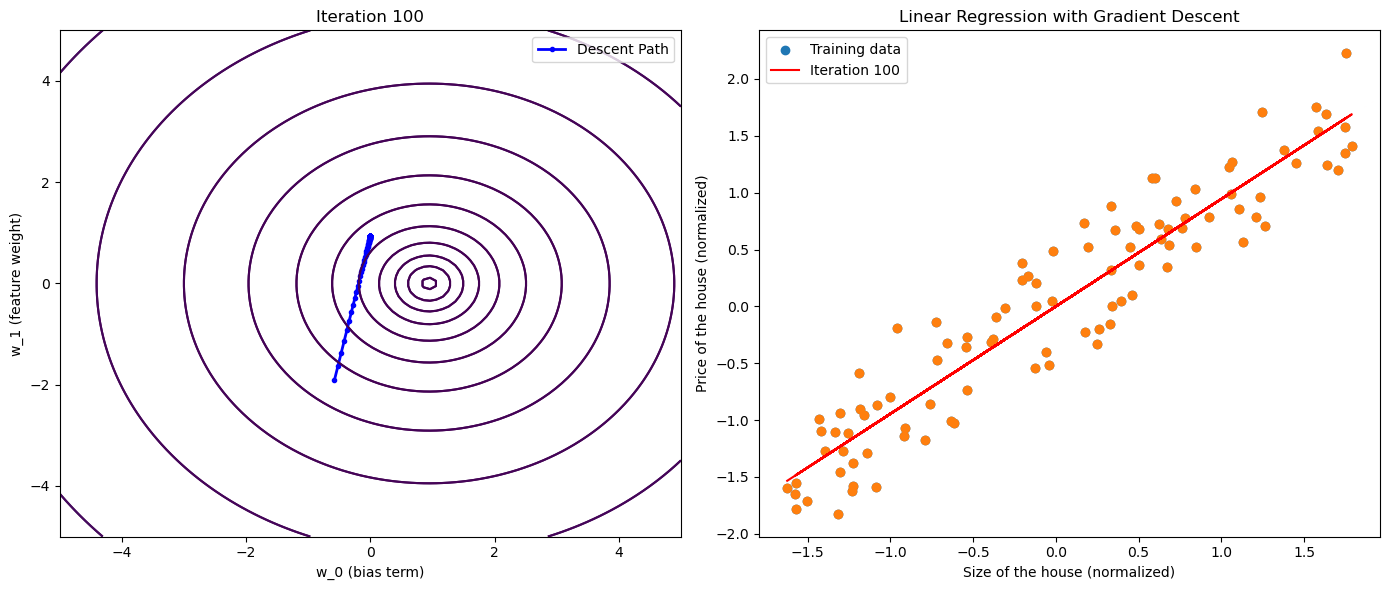

In [24]:
# Initial setup
T0, T1 = np.meshgrid(w0_vals, w1_vals)
learning_rate = 0.1
n_iterations = 100
w_path = []
w= np.random.randn(X.shape[1],1)  # random initialization
#w = np.zeros((X.shape[1], 1))  # Initialize vector w


# Function to compute the prediction error (known as residual error)
def calculate_residual_error(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    residual_error = (1/(2*m)) * np.sum((predictions - y)**2)
    return residual_error
residual_error_history = []

# Perform gradient descent and store the path
for iteration in range(n_iterations):
    gradients = (1/m) * X.T.dot(X.dot(w) - y_normalized)
    w = w - learning_rate * gradients
    current_pred_error = calculate_residual_error(X,y_normalized,w)    
    w_path.append(w.ravel())  # Flatten and store the weights for visualiztion     
    residual_error_history.append(current_pred_error)

w_path_np = np.array(w_path)

# Create the figure and axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Initialization function
def init():
    ax1.contour(T0, T1, J_w, levels=np.logspace(-2, 3, 20), cmap='viridis')
    ax2.scatter(x_1_normalized, y_normalized, label='Training data')
    return ax1, ax2

# Update function for each frame
def update(iteration):
    ax1.clear()
    ax2.clear()
    
    # Left plot: Contour plot of loss function
    ax1.contour(T0, T1, J_w, levels=np.logspace(-2, 3, 20), cmap='viridis')
    ax1.plot(w_path_np[:iteration+1, 0], w_path_np[:iteration+1, 1], 'bo-', linewidth=2, markersize=3, label='Descent Path')
    ax1.set_xlabel('w_0 (bias term)')
    ax1.set_ylabel('w_1 (feature weight)')
    ax1.set_title(f'Iteration {iteration + 1}')
    ax1.legend()
    
    # Right plot: Scatter plot of data and regression line
    ax2.scatter(x_1_normalized, y_normalized, label='Training data')
    y_pred = X.dot(w_path[iteration].reshape(-1, 1))
    ax2.plot(x_1_normalized, y_pred, color='red', label=f'Iteration {iteration + 1}')
    ax2.set_xlabel('Size of the house (normalized)')
    ax2.set_ylabel('Price of the house (normalized)')
    ax2.set_title('Linear Regression with Gradient Descent')
    ax2.legend()
    
    plt.tight_layout()
    return ax1, ax2

# Create the animation
anim = FuncAnimation(fig, update, frames=n_iterations, init_func=init, blit=False)

# Display the animation inline in Jupyter Notebook
HTML(anim.to_html5_video())

# Convergence of the cost function

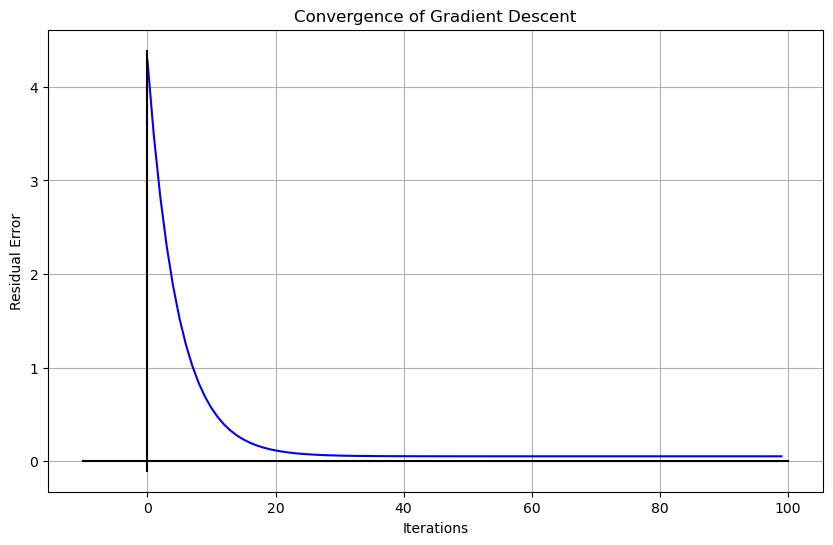

In [25]:

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), residual_error_history, 'b-')
plt.plot([-10, 100], [0, 0], "k-")
plt.plot([0, 0], [-0.1, residual_error_history[0]+0.1], "k-")
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.title('Convergence of Gradient Descent')
plt.grid(True)
plt.show()


# Comparing the result with linear regression from scikit-learn

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Fit linear regression using Scikit-learn
reg = LinearRegression()
# bias term is automatically included
reg.fit(X[:, 1:], y_normalized)  
print(f"Intercept: {reg.intercept_}, Coefficients: {reg.coef_}")

Intercept: [-6.12881987e-16], Coefficients: [[0.94452257]]


In [27]:
print(w)

[[-1.70954051e-05]
 [ 9.44438425e-01]]


In [28]:
x_test = [[1],[0.1]]
print(f"Predicted Value by Linear Regression in Scikit-learn: {reg.predict(x_test)} ")

Predicted Value by Linear Regression in Scikit-learn: [[0.94452257]
 [0.09445226]] 


In [29]:
print(f"Predicted Value by w: {w.T@x_test} ")

Predicted Value by w: [[0.09442675]] 
